In [ ]:
#Edgar Moises Hernandez-Gonzalez
#02/07/19-27/08/19
#Clasificacion de Mnist con CNN utilizando Keras
#Agregando un dropout y comentando la tercera capa convolucional
#Ejemplo de CNN facil

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 60000
n_samples_test : 10000


In [5]:
#convertir de 3D a 4D
x_train = x_train.reshape((n_samples_train, 28, 28, 1))
x_test = x_test.reshape((n_samples_test, 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [8]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 10


In [9]:
#modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
__________

In [11]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs = 5) #otros parametros batch_size, validation_data

Epoch 1/5
60000/60000 [==============================] - 12s 208us/sample - loss: 0.1878 - acc: 0.9421
Epoch 2/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0683 - acc: 0.9792 - loss: 0
Epoch 3/5
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0508 - acc: 0.9847
Epoch 4/5
60000/60000 [==============================] - 36s 593us/sample - loss: 0.0384 - acc: 0.9880 - loss: 0.0387
Epoch 5/5
60000/60000 [==============================] - 25s 423us/sample - loss: 0.0314 - acc: 0.9905


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 192us/sample - loss: 0.0267 - acc: 0.9908
Test loss: 0.026734244641404076
Test accuracy: 0.9908


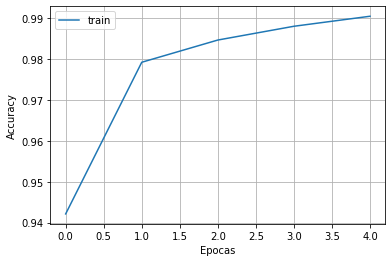

In [14]:
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

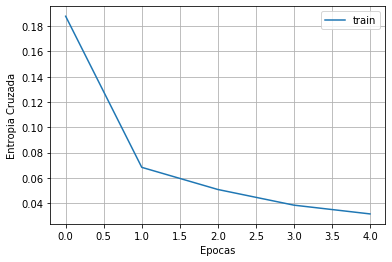

In [15]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [16]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [17]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[ 975    0    1    0    0    1    2    1    0    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    3 1021    0    1    0    0    6    0    0]
 [   1    0    0 1005    0    1    0    1    2    0]
 [   0    1    0    0  976    0    1    1    0    3]
 [   0    0    0    6    0  884    1    0    1    0]
 [   3    5    2    1    1    1  945    0    0    0]
 [   0    4    2    1    1    0    0 1016    1    3]
 [   3    0    3    0    0    0    1    1  965    1]
 [   1    4    0    0    6    8    1    0    1  988]]


In [18]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



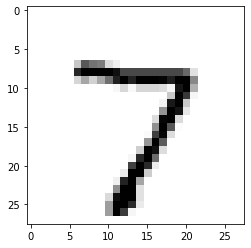

In [20]:
plt.imshow(x_test[0].reshape(28,28), cmap='Greys')
plt.show()

In [26]:
prediccion = model.predict(x_test[0].reshape(1,28,28,1))
print(prediccion.argmax())

7
